In [1]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [2]:
input_data = pd.read_excel("Inputdata.xlsx", index_col="Code", keep_default_na=False)

In [3]:
input_data_2_p = input_data.copy()

In [4]:
input_data_2_p["H2 Pipeline Preis"] = 3*input_data_2_p["H2 Pipeline Preis"]
input_data_2_p["NH3 Pipeline Preis"] = 3*input_data_2_p["NH3 Pipeline Preis"]
input_data_2_p["CH3OH Pipeline Preis"] = 3*input_data_2_p["CH3OH Pipeline Preis"]

In [5]:
input_data_2_p.to_excel("transport_cost_pipeline_input.xlsx")

In [6]:
expensive_pipeline = hydro_opt(input_data="transport_cost_pipeline_input.xlsx")
expensive_pipeline.optimize()

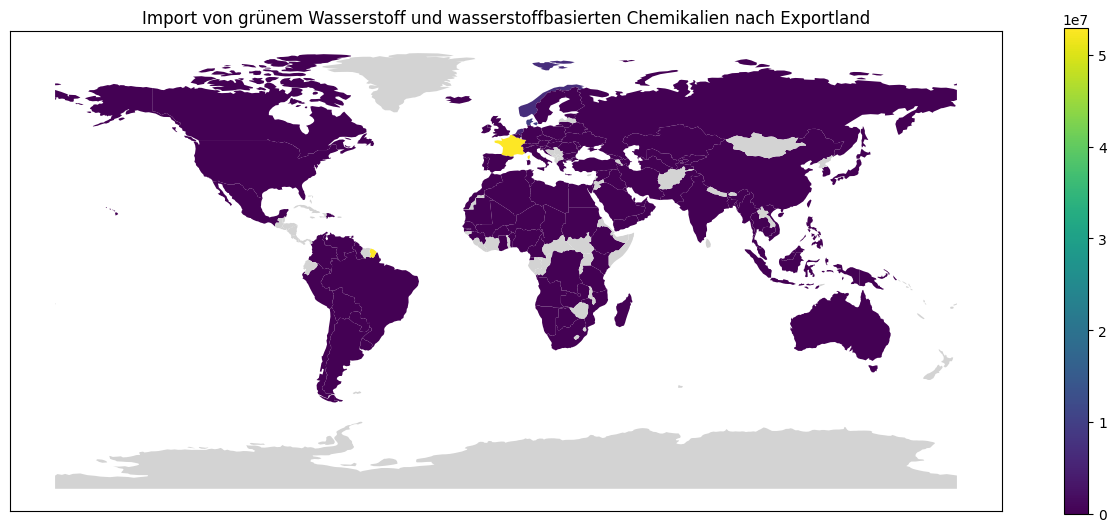

In [7]:
expensive_pipeline.visualize()

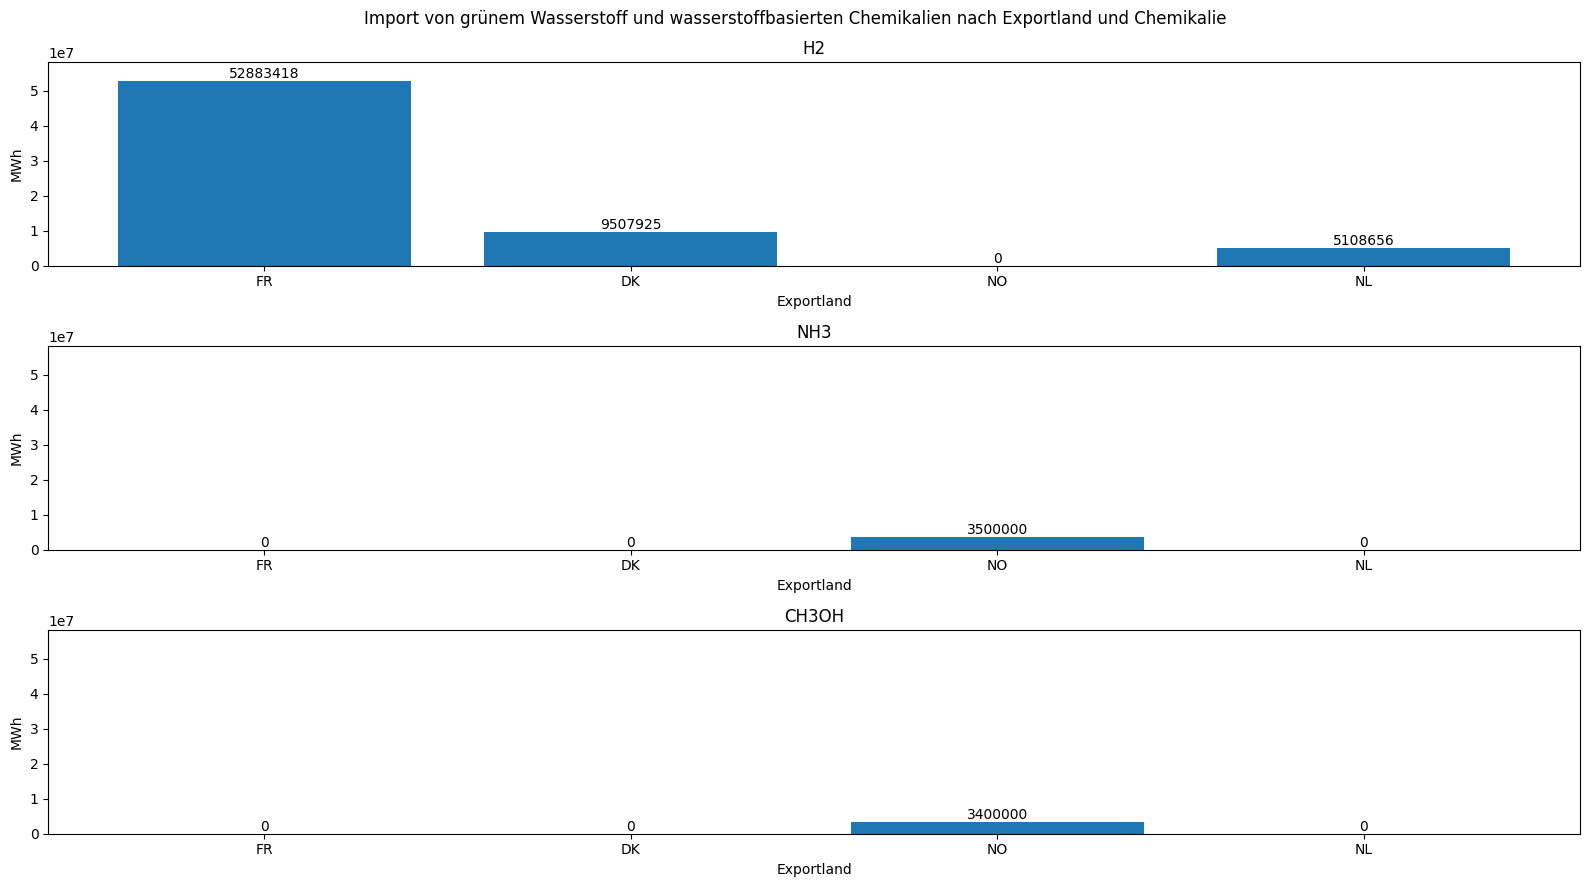

In [8]:
expensive_pipeline.visualize(what="commodities", vis_style="bar")
#plt.savefig("Transport - Chemikalien")

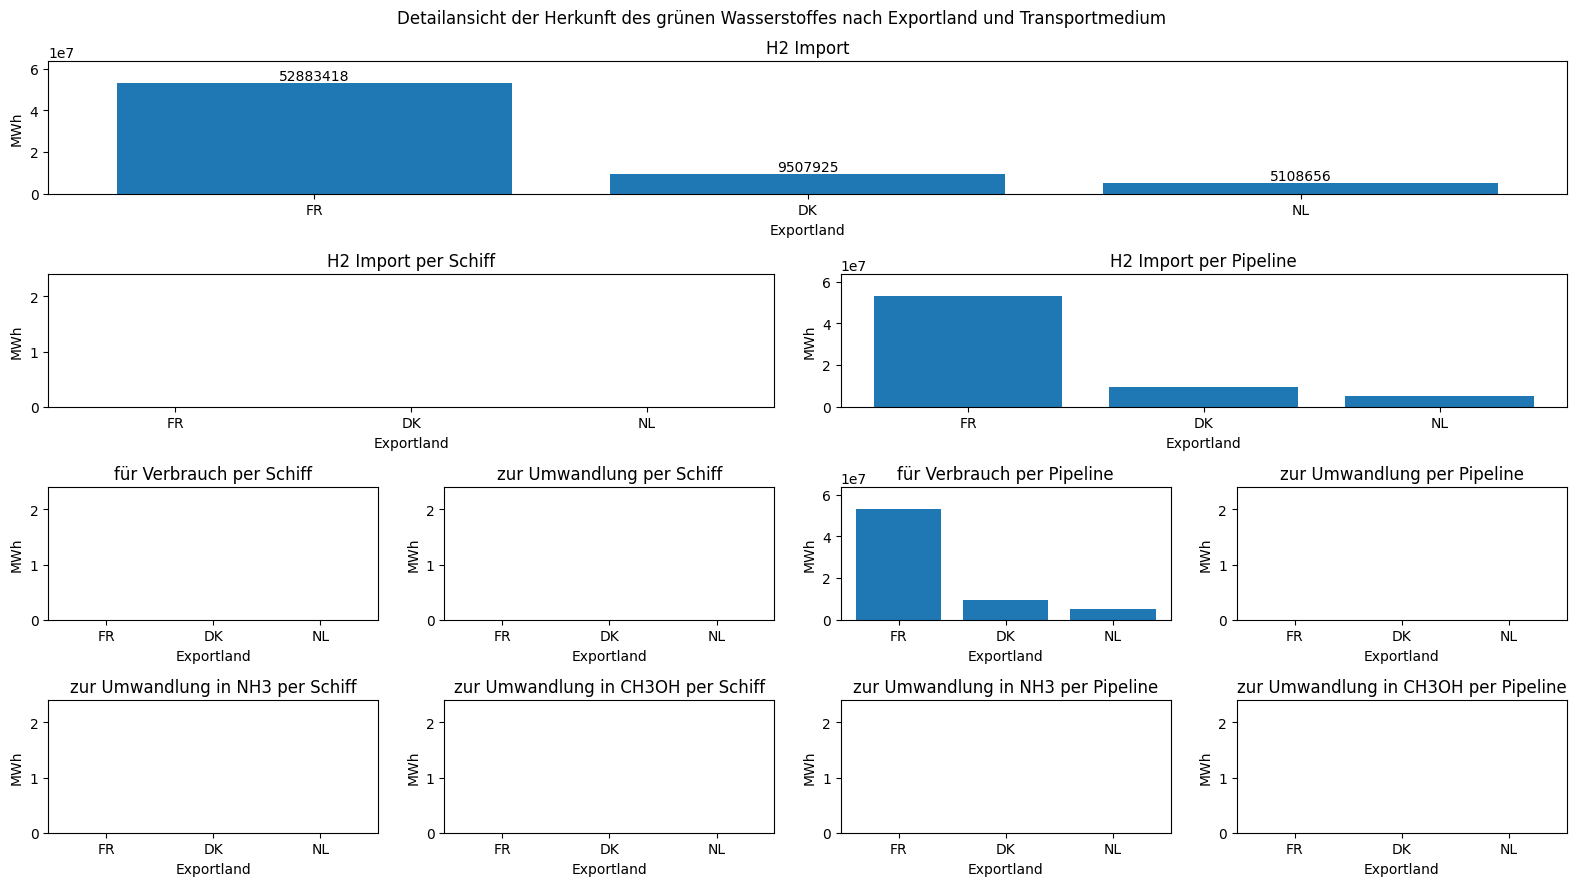

In [9]:
expensive_pipeline.visualize(what="hydrogen_conversion", vis_style="bar")

In [10]:
expensive_pipeline_import_limits = hydro_opt(input_data="transport_cost_input.xlsx")
expensive_pipeline_import_limits.optimize()

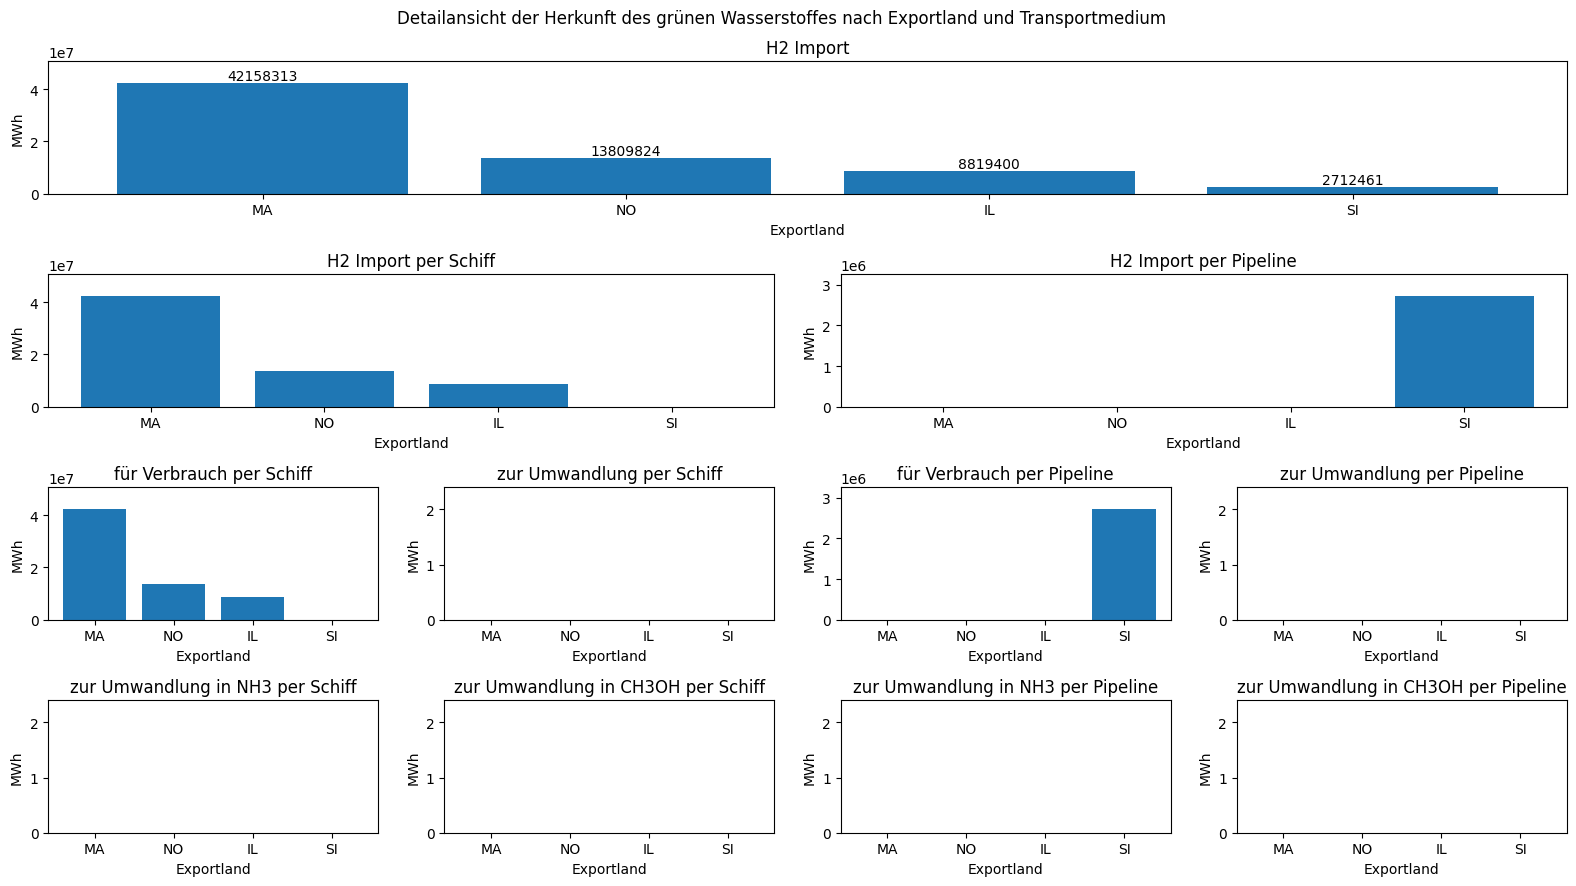

In [11]:
expensive_pipeline_import_limits.visualize(what="hydrogen_conversion", vis_style="bar")

In [12]:
pipeline_cost = 0
pipeline_costs = []
h2_ship = []
h2_pipeline = []
nh3_ship = []
nh3_pipeline = []
ch3oh_ship = []
ch3oh_pipeline = []

while 0 <= pipeline_cost <= 35:
    input_data_p = input_data.copy()
    input_data_p["H2 Pipeline Preis"] = pipeline_cost*input_data_p["H2 Pipeline Preis"]
    input_data_p["NH3 Pipeline Preis"] = pipeline_cost*input_data_p["NH3 Pipeline Preis"]
    input_data_p["CH3OH Pipeline Preis"] = pipeline_cost*input_data_p["CH3OH Pipeline Preis"]
    
    input_data_p.to_excel("transport_cost_pipeline_input.xlsx")
    
    model = hydro_opt(input_data="transport_cost_pipeline_input.xlsx")
    model.optimize()
    df = model.results_df
    h2_ship.append(df[(df['H2 Schiff']>0)].index.to_list())
    h2_pipeline.append(df[(df['H2 Pipeline']>0)].index.to_list())
    nh3_ship.append(df[(df['NH3 Schiff']>0)].index.to_list())
    nh3_pipeline.append(df[(df['NH3 Pipeline']>0)].index.to_list())
    ch3oh_ship.append(df[(df['CH3OH Schiff']>0)].index.to_list())
    ch3oh_pipeline.append(df[(df['CH3OH Pipeline']>0)].index.to_list())
    
    pipeline_costs.append(pipeline_cost)
    
    pipeline_cost += 0.5
    
    

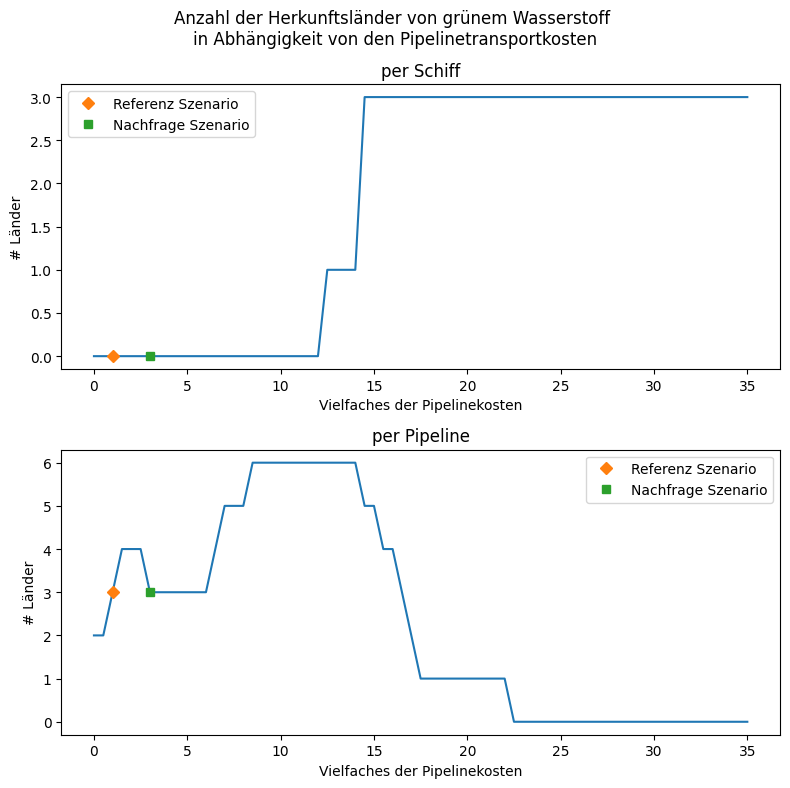

In [13]:
fig, ax = plt.subplots(2,1, figsize=(8,8))
fig.suptitle("Anzahl der Herkunftsländer von grünem Wasserstoff \nin Abhängigkeit von den Pipelinetransportkosten")
ax[0].plot(pipeline_costs, [len(x) for x in h2_ship])
ax[0].set_title("per Schiff")
ax[0].set_xlabel("Vielfaches der Pipelinekosten")
ax[0].set_ylabel("# Länder")
ax[0].plot(1,0, "D", label='Referenz Szenario')
ax[0].plot(3,0, "s", label='Nachfrage Szenario')
ax[0].legend()


ax[1].plot(pipeline_costs, [len(x) for x in h2_pipeline])
ax[1].set_title("per Pipeline")
ax[1].set_xlabel("Vielfaches der Pipelinekosten")
ax[1].set_ylabel("# Länder")
ax[1].plot(1,3, "D", label='Referenz Szenario')
ax[1].plot(3,3, "s", label='Nachfrage Szenario')
ax[1].legend()

plt.tight_layout()
#plt.savefig("Transport - Anzahl Länder - Pipeline", bbox_inches="tight")

In [27]:
dict(zip(ship_costs, h2_ship_s))

{0: ['CN', 'QA'],
 0.025: ['CN', 'IL', 'QA'],
 0.05: ['CN', 'IL', 'QA'],
 0.07500000000000001: ['CN', 'IL', 'NO', 'QA'],
 0.1: ['CN', 'IL', 'NO', 'QA'],
 0.125: ['IL', 'NO', 'QA', 'ES'],
 0.15: ['IL', 'NO', 'QA', 'ES'],
 0.175: ['IL', 'QA', 'ES'],
 0.19999999999999998: ['IL', 'QA'],
 0.22499999999999998: ['IL', 'QA'],
 0.24999999999999997: ['QA'],
 0.27499999999999997: [],
 0.3: [],
 0.325: [],
 0.35000000000000003: [],
 0.37500000000000006: [],
 0.4000000000000001: [],
 0.4250000000000001: [],
 0.4500000000000001: [],
 0.47500000000000014: [],
 0.5000000000000001: [],
 0.5250000000000001: [],
 0.5500000000000002: [],
 0.5750000000000002: [],
 0.6000000000000002: [],
 0.6250000000000002: [],
 0.6500000000000002: [],
 0.6750000000000003: [],
 0.7000000000000003: [],
 0.7250000000000003: [],
 0.7500000000000003: [],
 0.7750000000000004: [],
 0.8000000000000004: [],
 0.8250000000000004: [],
 0.8500000000000004: [],
 0.8750000000000004: [],
 0.9000000000000005: [],
 0.9250000000000005: [],

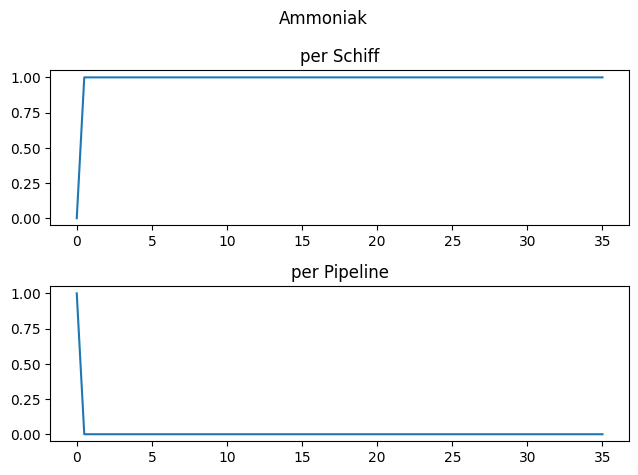

In [14]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Ammoniak")
ax[0].plot(pipeline_costs, [len(x) for x in nh3_ship])
ax[0].set_title("per Schiff")
ax[1].plot(pipeline_costs, [len(x) for x in nh3_pipeline])
ax[1].set_title("per Pipeline")

plt.tight_layout()

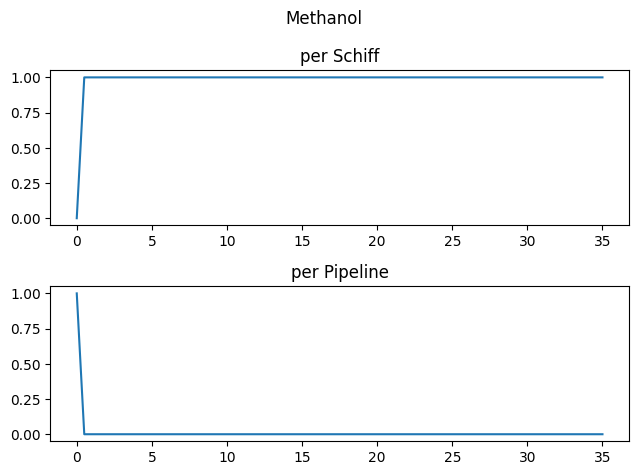

In [15]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Methanol")
ax[0].plot(pipeline_costs, [len(x) for x in ch3oh_ship])
ax[0].set_title("per Schiff")
ax[1].plot(pipeline_costs, [len(x) for x in ch3oh_pipeline])
ax[1].set_title("per Pipeline")

plt.tight_layout()

In [16]:
ship_cost = 0
ship_costs = []
h2_ship_s = []
h2_pipeline_s = []
nh3_ship_s = []
nh3_pipeline_s = []
ch3oh_ship_s = []
ch3oh_pipeline_s = []

while 0 <= ship_cost <= 2:
    input_data_s = input_data.copy()
    input_data_s["H2 Schiff Preis"] = ship_cost*input_data_s["H2 Schiff Preis"]
    input_data_s["NH3 Schiff Preis"] = ship_cost*input_data_s["NH3 Schiff Preis"]
    input_data_s["CH3OH Schiff Preis"] = ship_cost*input_data_s["CH3OH Schiff Preis"]
    
    input_data_s.to_excel("transport_cost_ship_input.xlsx")
    
    model = hydro_opt(input_data="transport_cost_ship_input.xlsx")
    model.optimize()
    df = model.results_df
    h2_ship_s.append(df[(df['H2 Schiff']>0)].index.to_list())
    h2_pipeline_s.append(df[(df['H2 Pipeline']>0)].index.to_list())
    nh3_ship_s.append(df[(df['NH3 Schiff']>0)].index.to_list())
    nh3_pipeline_s.append(df[(df['NH3 Pipeline']>0)].index.to_list())
    ch3oh_ship_s.append(df[(df['CH3OH Schiff']>0)].index.to_list())
    ch3oh_pipeline_s.append(df[(df['CH3OH Pipeline']>0)].index.to_list())
    
    ship_costs.append(ship_cost)
    
    ship_cost += 0.025

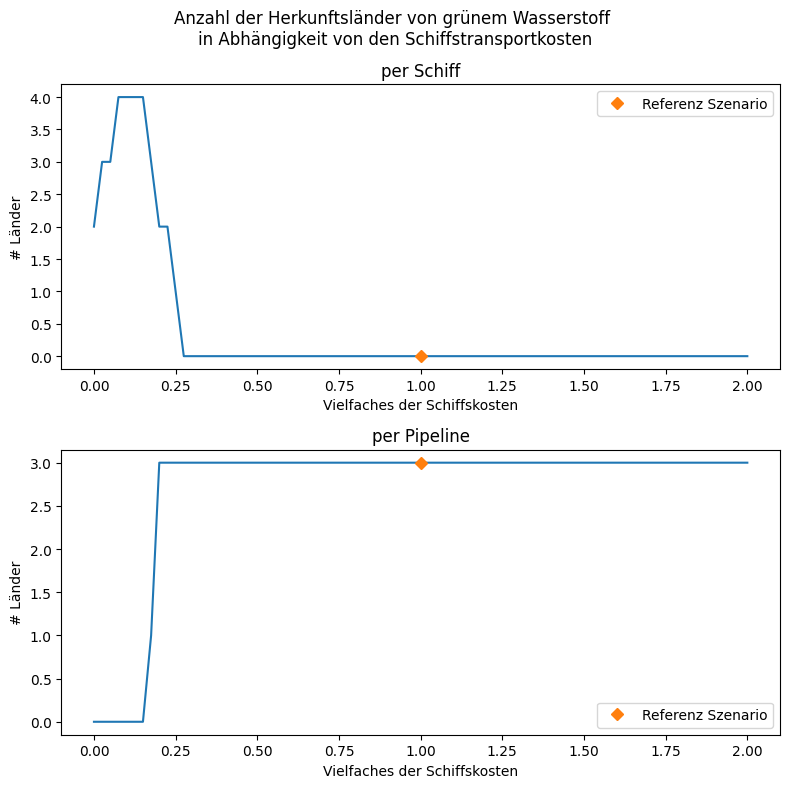

In [17]:
fig, ax = plt.subplots(2,1, figsize=(8,8))
fig.suptitle("Anzahl der Herkunftsländer von grünem Wasserstoff \nin Abhängigkeit von den Schiffstransportkosten")
ax[0].plot(ship_costs, [len(x) for x in h2_ship_s])
ax[0].set_title("per Schiff")
ax[0].set_xlabel("Vielfaches der Schiffskosten")
ax[0].set_ylabel("# Länder")
ax[0].plot(1,0, "D", label='Referenz Szenario')
ax[0].legend()


ax[1].plot(ship_costs, [len(x) for x in h2_pipeline_s])
ax[1].set_title("per Pipeline")
ax[1].set_xlabel("Vielfaches der Schiffskosten")
ax[1].set_ylabel("# Länder")
ax[1].plot(1,3, "D", label='Referenz Szenario')
ax[1].legend()

plt.tight_layout()
#plt.savefig("Transport - Anzahl Länder - Schiff", bbox_inches="tight")

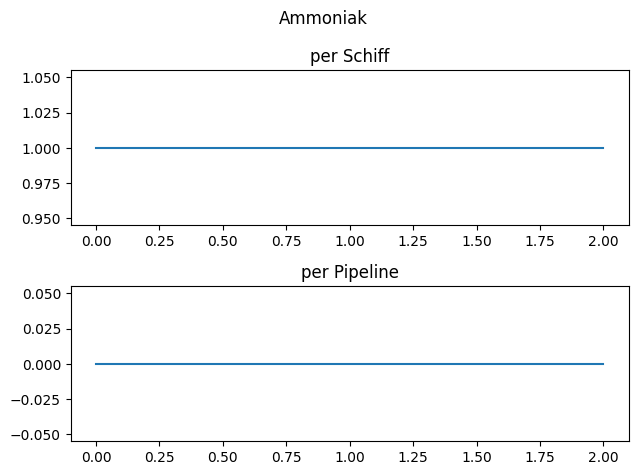

In [18]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Ammoniak")
ax[0].plot(ship_costs, [len(x) for x in nh3_ship_s])
ax[0].set_title("per Schiff")
ax[1].plot(ship_costs, [len(x) for x in nh3_pipeline_s])
ax[1].set_title("per Pipeline")

plt.tight_layout()

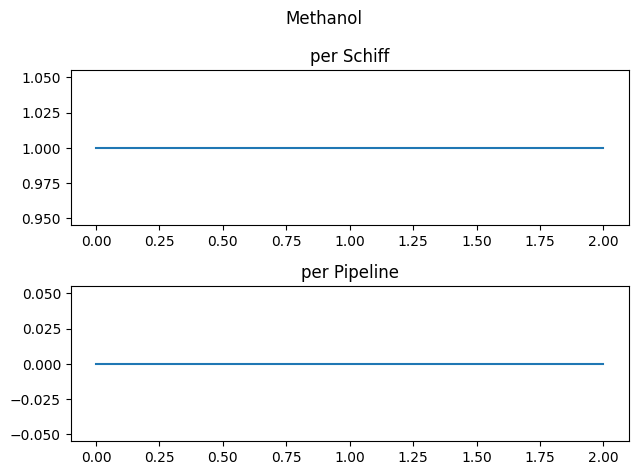

In [19]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Methanol")
ax[0].plot(ship_costs, [len(x) for x in ch3oh_ship_s])
ax[0].set_title("per Schiff")
ax[1].plot(ship_costs, [len(x) for x in ch3oh_pipeline_s])
ax[1].set_title("per Pipeline")

plt.tight_layout()